In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly
from matplotlib.animation import FuncAnimation

In [70]:
# Reading the the Global land by majorcity dataset

pd.options.plotting.backend = "plotly"
pd.set_option('display.width', 200)

plt.style.use('dark_background')

"""With pandas loaded data as a dataframe"""

df_City = pd.read_csv('GlobalLandTemperaturesByCity.csv')
df_MajorCity = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
# Display precise information about the DataFrame, including data types, non-null values, and memory usage
df_MajorCity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [71]:
#DATA CLEANING

"""### Count any missing values in each column, sort the results in descending order?"""


df_MajorCity.isnull().sum().sort_values(ascending=False)
# Find the common elements (intersection) between the unique values of 'City' in two DataFrames, df_MajorCity and df_City

# set(df_MajorCity.City.unique()).intersection(df_City.City.unique())

df_MajorCity_clean = df_MajorCity.loc[:,['dt','AverageTemperature','City']].copy()
# Drop null rows if any column value is null
df_MajorCity_clean = df_MajorCity_clean.dropna(how='any')
df_MajorCity_clean['dt'] = pd.to_datetime(df_MajorCity_clean['dt']) #convert dt to datetime format
df_MajorCity_clean['year'] = df_MajorCity_clean['dt'].dt.year #Create a new year column which has only year
df_MajorCity_clean = df_MajorCity_clean[df_MajorCity_clean['year']>=1750] # filter out on information from 1750 and above.
df_MajorCity_clean = df_MajorCity_clean.drop_duplicates() #drop duplicates
df_MajorCity_clean = df_MajorCity_clean.reset_index(drop=True) # Reset the index of the DataFrame df_MajorCity_clean and drop the previous index
df_MajorCity_clean.info()# Display precise information about the DataFrame, including data types, non-null values, and memory usage
#display statistical summary eg mean,count etc
df_MajorCity_clean.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228006 entries, 0 to 228005
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   dt                  228006 non-null  datetime64[ns]
 1   AverageTemperature  228006 non-null  float64       
 2   City                228006 non-null  object        
 3   year                228006 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 6.1+ MB


,dt,AverageTemperature,year
count,228006,228006.000000,228006.000000
mean,1914-06-23 19:05:33.938579968,18.134369,1914.018964
min,1750-01-01 00:00:00,-26.772000,1750.000000
25%,1870-02-01 00:00:00,12.726000,1870.000000
50%,1918-09-01 00:00:00,20.438000,1918.000000
75%,1966-03-01 00:00:00,25.921000,1966.000000
max,2013-09-01 00:00:00,38.283000,2013.000000
std,NaN,10.021373,61.876666


MovieWriter imagemagick unavailable; using Pillow instead.


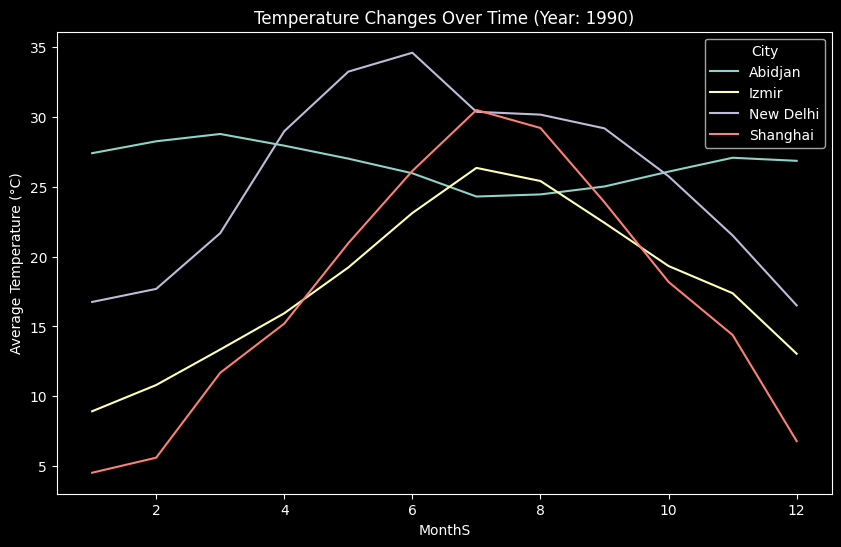

In [72]:


# Convert the 'dt' column to datetime format
df_MajorCity_clean['dt'] = pd.to_datetime(df_MajorCity_clean['dt'])

# Extract year and month from the 'dt' column
df_MajorCity_clean['year'] = df_MajorCity_clean['dt'].dt.year
df_MajorCity_clean['month'] = df_MajorCity_clean['dt'].dt.month
# Filter years for 2013
data = df_MajorCity_clean[(df_MajorCity_clean['year'] >= 1880) & (df_MajorCity_clean['year'] <= 1990)]
sample_cities = ['Los angelos', 'Shanghai', 'New Delhi', ' Madras', 'Abidjan', 'Izmir']
data = data[(data['City'].isin(sample_cities))]
# Check if 'Country' column is present in data
if 'City' in data.columns:
    # Create an animated time series plot for sample countries
    plt.figure(figsize=(10, 6))

    def update(frame):
        plt.clf()
        df = data[data['year'] == frame]
        ax = sns.lineplot(x='month', y='AverageTemperature', hue='City', data=df)
        ax.set_title(f'Temperature Changes Over Time (Year: {frame})')
        ax.set_xlabel('MonthS')
        ax.set_ylabel('Average Temperature (°C)')

    # Animating the plot
    years = sorted(data['year'].unique())
    ani = FuncAnimation(plt.gcf(), update, frames=years, repeat=True, interval=500)

    # Save the animation as a GIF using ImageMagick
    ani.save('temperature_changes.gif', writer='imagemagick')
    plt.show()
else:
    print("Error: 'Country' column not found in the DataFrame.")


In [73]:
# Finding  Cities with largest temperature ranges over time.

#  create a column rank and assign the 'AverageTemperature' values within each 'dt' group in df_MajorCity_clean.
df_MajorCity_clean["rank"] = df_MajorCity_clean.groupby("dt")["AverageTemperature"].\
rank(method="dense", ascending=False)
# Display the first few rows of  df_MajorCity_clean with the added 'rank' column
df_MajorCity_clean.head()
#counts of each rank for each city ( we have 4 ranks)
df_MajorCity_ranks = \
df_MajorCity_clean.groupby(['City','rank'])['rank'].count().rename('count').reset_index().\
  pivot(index='City', columns='rank', values='count').reset_index().\
  sort_values(by=[1,2,3,4], ascending=[False, False, False,False]).\
  reset_index(drop=True).\
  iloc[:,:5]

df_MajorCity_ranks = df_MajorCity_ranks.rename_axis(None, axis=1)
df_MajorCity_ranks.head(15)

,City,1.0,2.0,3.0,4.0
0,Riyadh,458.0,133.0,22.0,29.0
1,Izmir,347.0,146.0,52.0,34.0
2,Umm Durman,305.0,183.0,151.0,138.0
3,Fortaleza,278.0,97.0,87.0,40.0
4,Hyderabad,230.0,106.0,76.0,61.0
5,Baghdad,171.0,314.0,59.0,59.0
6,Ibadan,158.0,74.0,84.0,82.0
7,Nagpur,151.0,146.0,51.0,27.0
8,Bombay,119.0,100.0,72.0,70.0
9,Casablanca,117.0,158.0,46.0,28.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


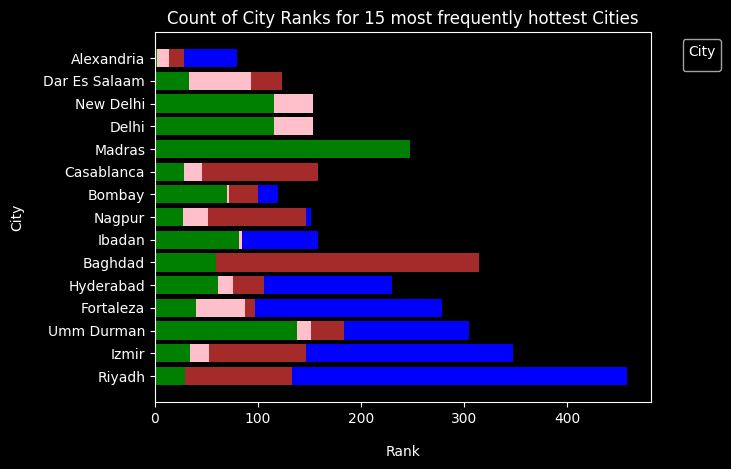

,dt,Abidjan,Addis Abeba,Ahmadabad,Aleppo,Alexandria,Ankara,Baghdad,Bangalore,Bangkok,...,São Paulo,Taipei,Taiyuan,Tangshan,Tianjin,Tokyo,Toronto,Umm Durman,Wuhan,Xian
0,1750-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-8.613,NaN,NaN,NaN
1,1750-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-7.920,NaN,NaN,NaN
2,1750-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-2.468,NaN,NaN,NaN
3,1750-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.628,NaN,NaN,NaN
4,1750-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.169,NaN,NaN,NaN


In [74]:
# Ploting the top 15 hottest cities
# plot data in stack manner of bar type
data = (df_MajorCity_ranks.head(15)).set_index('City')
#assign colors to graph
cols = ["blue", "brown", "pink", "green"]
for rank, col in zip(data.columns, cols):
  plt.barh(data.index, data.loc[:,rank], color=col)
plt.xlabel("Rank",labelpad=14)
plt.ylabel("City", labelpad=14)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left', )
plt.title("Count of City Ranks for 15 most frequently hottest Cities")
data = px.data.medals_long()
plt.show()

data

df_MajorCity_dt = \
df_MajorCity_clean.pivot(index='dt', columns='City', values='AverageTemperature').reset_index()

df_MajorCity_dt = df_MajorCity_dt.rename_axis(None, axis=1)
df_MajorCity_dt.head()

In [75]:
# Work with topn cities
cities = ['dt'] + (df_MajorCity_ranks.nlargest(5, 1))['City'].tolist()
df_MajorCity_dt_viz = df_MajorCity_dt.loc[:,cities]
df_MajorCity_dt_viz = df_MajorCity_dt_viz.set_index('dt').dropna(how='any')
df_MajorCity_dt_viz.head()

# df_MajorCity_dt_viz.to_csv('df_MajorCity_dt_viz.csv')

,Riyadh,Izmir,Umm Durman,Fortaleza,Hyderabad
dt,,,,,
1887-01-01,12.816,9.786,21.397,25.666,22.563
1887-02-01,15.397,8.980,23.598,25.403,24.381
1887-03-01,18.755,12.312,26.608,25.129,28.854
1887-04-01,25.394,13.780,31.258,25.300,31.226
1887-05-01,29.501,19.992,33.091,25.470,32.373


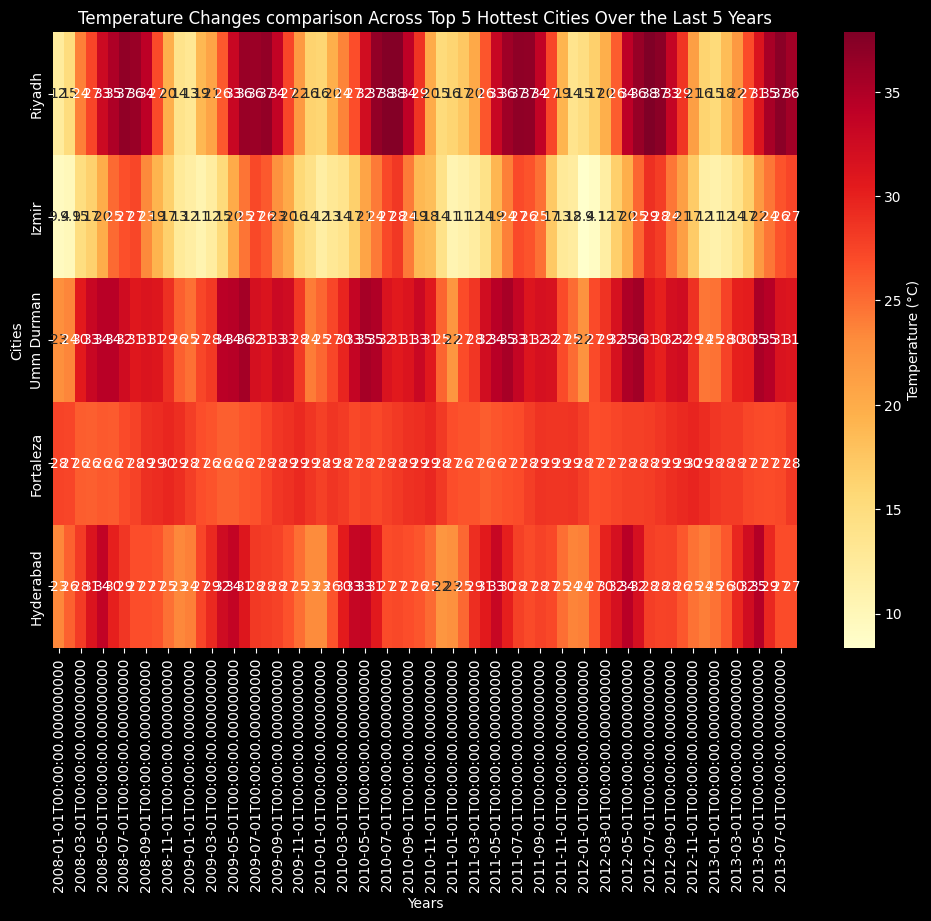

In [76]:


# showing comparison in hight  average temperature ranges among the top five cities.

# Filtering the last 5 years
df_MajorCity_dt_viz = df_MajorCity_dt_viz[df_MajorCity_dt_viz.index.year >= (df_MajorCity_dt_viz.index.year.max() -5)]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_MajorCity_dt_viz.transpose(), cmap='YlOrRd',  annot=True, cbar_kws={'label': 'Temperature (°C)'})
plt.xlabel('Years')
plt.ylabel('Cities')
plt.title('Temperature Changes comparison Across Top 5 Hottest Cities Over the Last 5 Years')
plt.show()


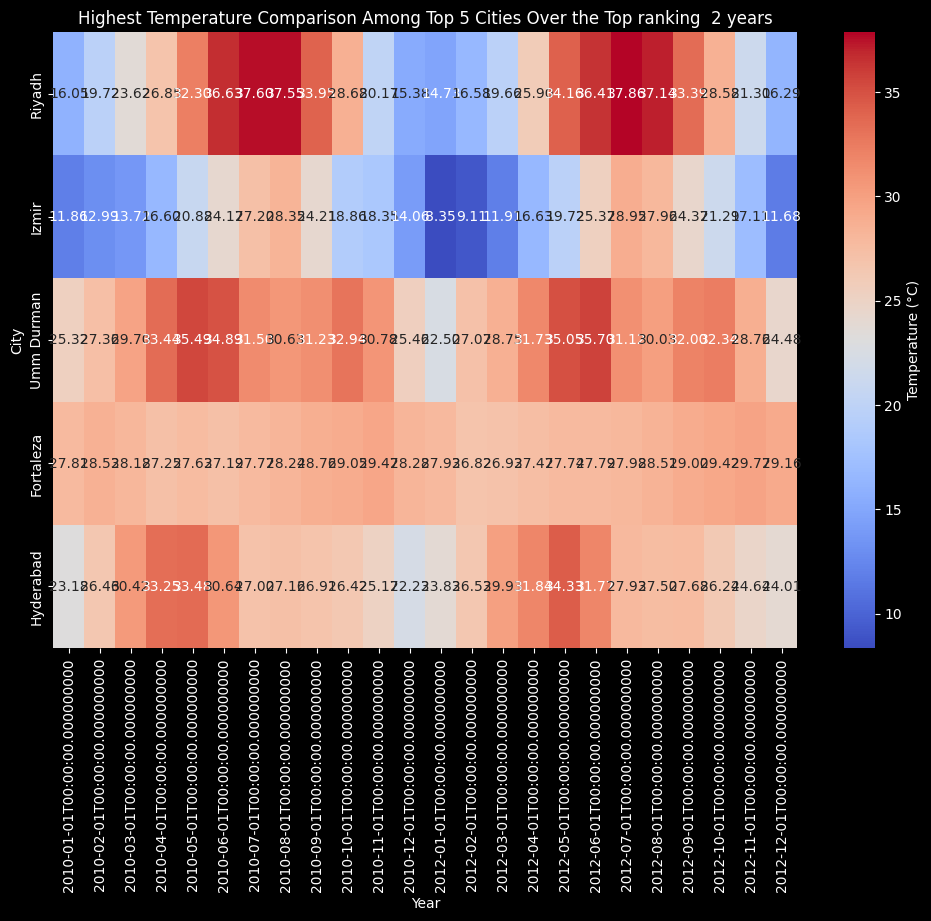

In [77]:


# Find the top five years with the highest temperatures
top_five_years = df_MajorCity_dt_viz.resample('Y').max().mean(axis=1).nlargest(2).index.year

# Filter the DataFrame for the top five years
df_MajorCity_dt_viz_top_years = df_MajorCity_dt_viz[df_MajorCity_dt_viz.index.year.isin(top_five_years)]

#  heatmap plot
plt.figure(figsize=(12, 8))

# Using diverging colormap to show  temperature differences
cmap = sns.color_palette("coolwarm", as_cmap=True)

sns.heatmap(df_MajorCity_dt_viz_top_years.transpose(),  annot=True, cmap=cmap, fmt=".2f", cbar_kws={'label': 'Temperature (°C)'})
plt.xlabel('Year')
plt.ylabel('City')
plt.title('Highest Temperature Comparison Among Top 5 Cities Over the Top ranking  2 years')
plt.show()


In [78]:
df_MajorCity_clean[df_MajorCity_clean['City']=='Los Angeles']

,dt,AverageTemperature,City,year,month,rank
124324,1849-01-01,8.819,Los Angeles,1849,1,34.0
124325,1849-02-01,9.577,Los Angeles,1849,2,34.0
124326,1849-03-01,11.814,Los Angeles,1849,3,35.0
124327,1849-04-01,13.704,Los Angeles,1849,4,37.0
124328,1849-05-01,14.834,Los Angeles,1849,5,46.0
...,...,...,...,...,...,...
126296,2013-05-01,19.028,Los Angeles,2013,5,64.0
126297,2013-06-01,22.434,Los Angeles,2013,6,59.0
126298,2013-07-01,25.090,Los Angeles,2013,7,50.0
126299,2013-08-01,24.232,Los Angeles,2013,8,57.0


In [79]:
from geopy import distance

def distance_between_coordinates(origin: tuple, destination: tuple): # origin = (Latitude, Longitude)
    distance_value = distance.geodesic(origin, destination).km
    return distance_value

distance_between_coordinates((30.11, 31.22), (32.15, 35.23))

444.2719099752713

In [80]:
def nearest_cities(current_city, year_, df):
    df['dt'] = pd.to_datetime(df['dt'])
    data = df[df['year'].dt.year==year_]
    data_agg = data.groupby(['City','Latitude','Longitude'])['AverageTemperature'].mean().rename('avg_temp').reset_index()
    current_city_coord = data_agg[data_agg['City']==current_city].loc[:,['Latitude','Longitude']].values
    current_city_coord = [tuple(x) for x in current_city_coord][0]
    data_agg['avg_temp'].apply(distance_between_coordinates(current_city_coord, ) )


In [81]:
df_MajorCity.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [82]:
dr = df_MajorCity.groupby(['City','Latitude','Longitude'])['AverageTemperature'].mean().\
    rename('avg_temp').reset_index()
dr.head()

,City,Latitude,Longitude,avg_temp
0,Abidjan,5.63N,3.23W,26.163737
1,Addis Abeba,8.84N,38.11E,17.525073
2,Ahmadabad,23.31N,72.52E,26.529853
3,Aleppo,36.17N,37.79E,17.370587
4,Alexandria,31.35N,30.16E,20.312617


In [83]:
dr[dr['City']=='Los Angeles'].loc[:,['Latitude','Longitude']].values

array([['34.56N', '118.70W']], dtype=object)

In [84]:
re = dr[dr['City']=='Los Angeles'].loc[:,['Latitude','Longitude']].values
[tuple(x) for x in re][0]

('34.56N', '118.70W')

In [85]:
dr.aply(lam)

AttributeError: 'DataFrame' object has no attribute 'aply'